<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №6. Автоколебания в системах различной природы: генератор Ван-дер-Поля.**

Автоколебательные системы относятся к системам неконсервативным – в составе действующих на такие системы сил имеются силы сопротивления, и движение сопровождается расходом энергии. В этом отношении автоколебательные системы ведут себя аналогично диссипативным. 
Но в диссипативных системах энергия, расходуемая на преодоление сопротивления, ничем не компенсируется и колебания в таких системах затухают тогда, как в автоколебательных системах расход энергии точно 
компенсируется поступлениями из некоторого входящего в состав системы 
не колебательного источника. 

**Автоколебания** – это незатухающие колебания, которые возникают 
без периодической внешней возмущающей силы. Автоколебания 
принципиально отличаются, например, от колебаний маятника тем, 
что их характеристики (амплитуда, период) не зависят от начальных 
условий, и поддерживаются свойствами самой системы. Через некоторое время после начала движения система выходит на один и тот 
же цикл колебаний, называемый **предельным циклом**. На фазовой плоскости ему соответствует изолированная замкнутая кривая.

Окружность r = 1 является устойчивым предельным циклом. Если 
начальная точка лежит на окружности, то она не покинет окружность. 
Точки вне окружности притягиваются к ней, но никогда не смогут ее достигнуть, стремление – асимптотическое.
Таким образом, в нелинейных системах возможно существование 
периодического асимптотически устойчивого движения, называемого автоколебанием, математическим образом которого является предельный 
цикл. 

Дифференциальная модель генератора Ван дер Поля:

$
\left\{
\begin{array}{cc}
\cfrac{dx}{dt} = y \\
\cfrac{dy}{dt} = 2 μ(1-x^2)y-x \\
\end{array}
\right.
$


In [1]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pylab

stat_dpi = 90
rect_pics = (5, 5)
dynamics_pics = (9, 5)

In [2]:
def plotTS(y1, y2, time):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = "#800000" , label = "y1")
    plt.plot(time, y2, c = "orange", label = "y2")
    plt.xlabel("time")
    plt.ylabel("y1, y2")  
    plt.title("Численное решение компонент системы")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plotFP(y1, y2, centers = None, starts = None, color = "#CD5C5C"):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    if centers is not None:
        for i in centers:
            plt.scatter(i[0], i[1])
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1])
    plt.xlabel("y1")
    plt.ylabel("y2")  
    plt.title("Фазовый портрет системы")
    plt.legend()
    plt.grid(True)
    plt.show() 

In [3]:
def analyze(f, nulls, starts, mu=1, time_end=300):
    time = np.linspace(0, time_end, 5000)
    print(f'mu = {mu}')
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, (mu,))
        y1 = w[:, 0]
        y2 = w[:, 1]
        plotTS(y1, y2, time)
        plotFP(y1, y2, starts = [i], centers = nulls)

In [4]:
def vanderpol(y, t, mu=0.1):
  y1, y2 = y
  dy1, dy2 = y2, 2 * mu * y2 * (1 - y1 ** 2) - y1
  return [dy1, dy2]

Форма автоколебаний и предельного цикла зависит от значения параметра возбуждения $μ$.

При малых значениях, когда $μ≈0$, уравнение 
близко к уравнению гармонического осциллятора.

mu = 0
В точке [0, 0.5]


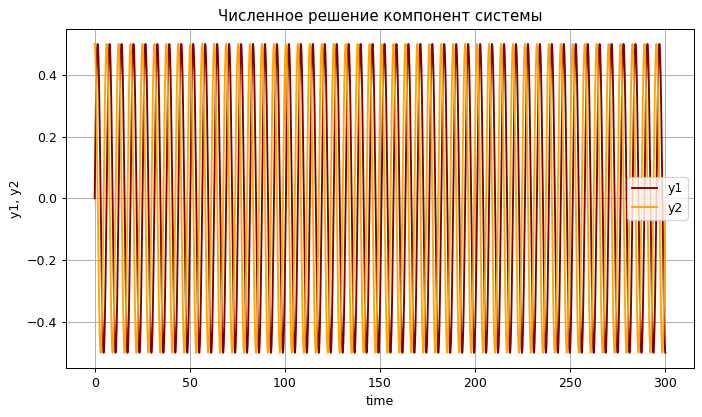

No handles with labels found to put in legend.


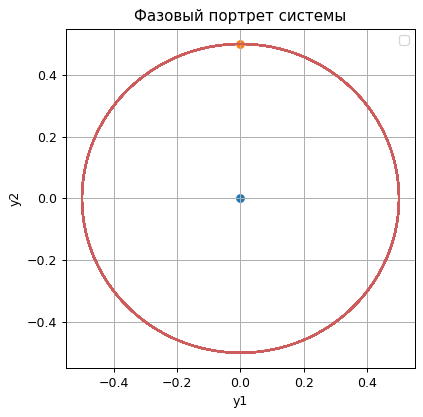

В точке [0.5, 2.5]


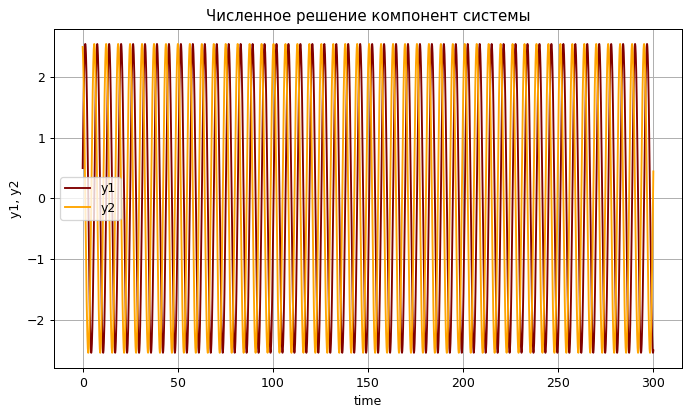

No handles with labels found to put in legend.


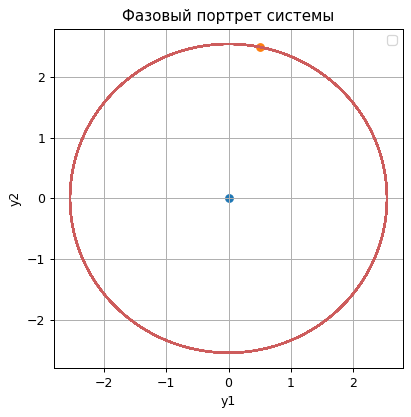

In [9]:
initial_points  = [[0, 0.5],
          [0.5, 2.5]]

special_points = [[0, 0]]
analyze(vanderpol, special_points, initial_points, mu = 0)

Через некоторое время после начала движения в системе устанавливаются автоколебания, образом которых на фазовой плоскости является цикл эллиптической формы. Результаты численного интегрирования системы при малых $μ$ показаны ниже.

Рассматриваются две траектории, они выходят из различных 
начальных точек, одна расположена внутри (синяя), а другая – снаружи (оранжевая) предельного цикла.

С ростом $t$ обе траектории асимптотически притягиваются 
к предельному циклу, которому соответствует периодическое движение, близкое к синусоидальным колебаниям, изображенным на графиках с названием "Численное решение компонент системы".


mu = 0.4
В точке [0, 0.5]


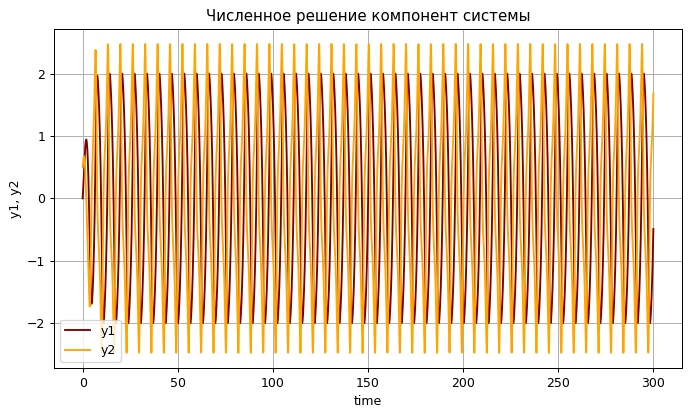

No handles with labels found to put in legend.


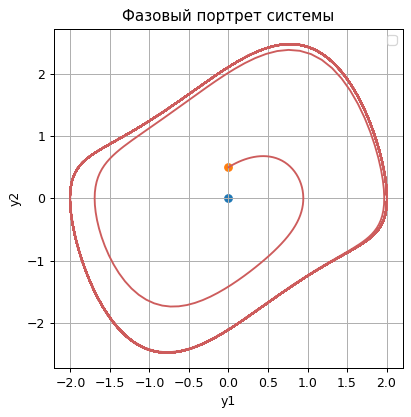

В точке [0.5, 2.5]


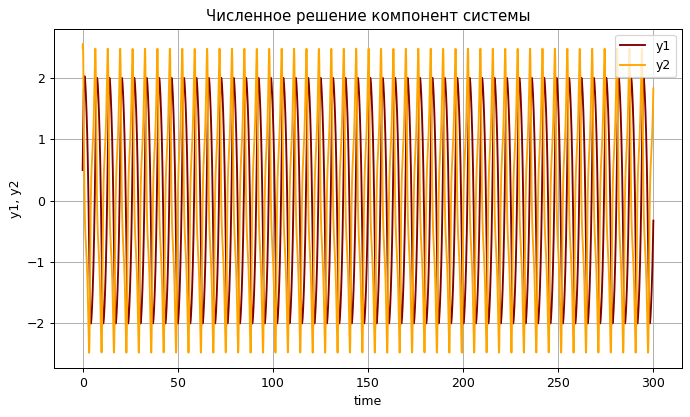

No handles with labels found to put in legend.


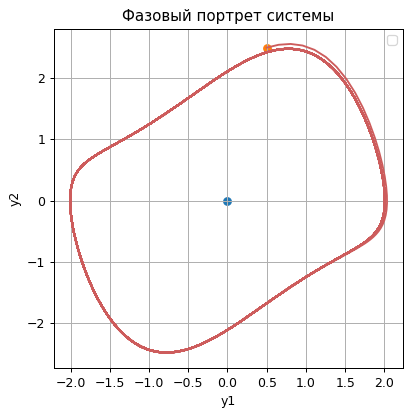

In [6]:
initial_points  = [[0, 0.5],
          [0.5, 2.5]]

special_points = [[0, 0]]
analyze(vanderpol, special_points, initial_points, mu = 0.4)

С ростом значений параметра $μ$, при $μ>1$, предельный цикл приобретает прямоугольную форму, что приводит к появлению двух различных 
масштабов времени: вслед за медленным дрейфом происходит резкое изменение амплитуды.

Динамика амплитуды становится похожа 
на "пилообразный" сигнал. Перед нами временная зависимость типа релаксационных колебаний.

mu = 1.1
В точке [0, 0.5]


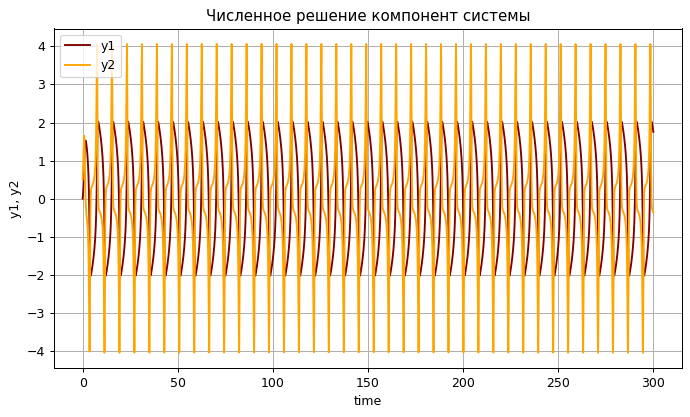

No handles with labels found to put in legend.


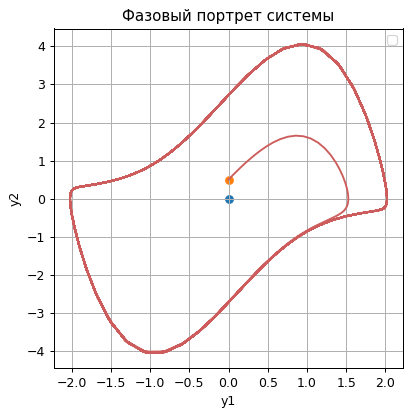

В точке [0.5, 2.5]


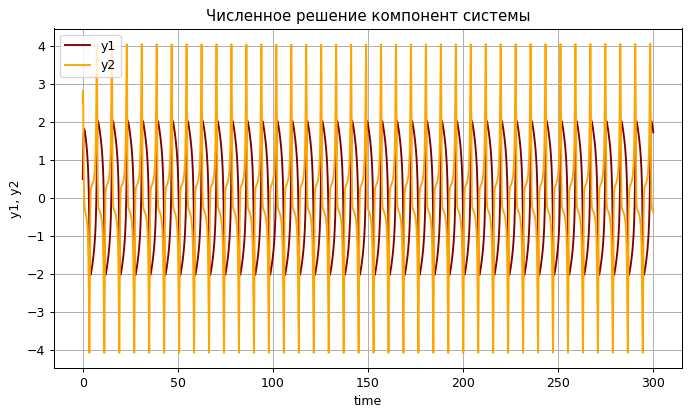

No handles with labels found to put in legend.


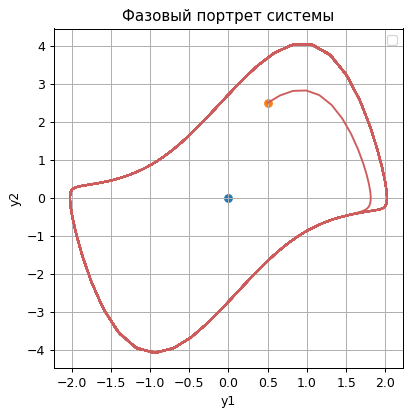

In [10]:
analyze(vanderpol, special_points, initial_points, mu=1.1)

Линейный анализ устойчивости системы показывает наличие единственной особой точки $x^*=y^*=0$, которая при $μ>1 \ (δ^2> ω_0^2)$ является неустойчивым узлом, а при $0<μ<1 \ (δ^2< ω_0^2)$  − неустойчивым фокусом. В нелинейной системе эти особые точки оказываются внутри замкнутой траектории – устойчивого предельного цикла. 